In [3]:
"""
import shutil
import os

for exp in ["norm","cnorm","cnormu","gcstdu"]:
    for suffix in ["","_div4","_div8"]:
        for p in ["2.0_1","1.6_1"]:
            os.makedirs(f"../../data/adam_wbn/{exp + suffix}/{p}")
            print(f'rsync -a hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/{exp + suffix}/{p}/ ./data/adam_wbn/{exp + suffix}/{p} --info=progress2 --exclude="grads" --exclude="hessians" --exclude="states"')
        #for subexp in os.listdir(f"{data_path}/{exp + suffix}"):
        #    p = subexp.split("_")[0]
        #    if p=="3.4" or p == "3.0" or p=="2.6" or float(p)<2.3:
                #print(f"{data_path}/{exp + suffix}/{subexp}")
                #shutil.rmtree(args.save_path + "states")

for exp in ["wd"]:
    for suffix in ["","_div4","_div8"]:
        for subexp in os.listdir(f"{data_path}/{exp + suffix}"):
            p = subexp
            if float(p)>6.5e-05:
                print(f"{data_path}/{exp + suffix}/{subexp}")
                shutil.rmtree(f"{data_path}/{exp + suffix}/{subexp}")
"""

'\nimport shutil\nimport os\n\nfor exp in ["norm","cnorm","cnormu","gcstdu"]:\n    for suffix in ["","_div4","_div8"]:\n        for p in ["2.0_1","1.6_1"]:\n            os.makedirs(f"../../data/adam_wbn/{exp + suffix}/{p}")\n            print(f\'rsync -a hpc:/share/users/student/l/llemke/bachelorthesis/data/adam_wbn/{exp + suffix}/{p}/ ./data/adam_wbn/{exp + suffix}/{p} --info=progress2 --exclude="grads" --exclude="hessians" --exclude="states"\')\n        #for subexp in os.listdir(f"{data_path}/{exp + suffix}"):\n        #    p = subexp.split("_")[0]\n        #    if p=="3.4" or p == "3.0" or p=="2.6" or float(p)<2.3:\n                #print(f"{data_path}/{exp + suffix}/{subexp}")\n                #shutil.rmtree(args.save_path + "states")\n\nfor exp in ["wd"]:\n    for suffix in ["","_div4","_div8"]:\n        for subexp in os.listdir(f"{data_path}/{exp + suffix}"):\n            p = subexp\n            if float(p)>6.5e-05:\n                print(f"{data_path}/{exp + suffix}/{subexp}")\n

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

2025-02-28 14:17:58.161722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-02-28 14:17:58.172053: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-02-28 14:17:58.174827: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-28 14:17:58.719435: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
data_path = "../../data/adam_wbn"
image_path = "./images"

lr_to_p_fn = lambda lr : np.sqrt(0.001/lr)
to_log_fn = lambda wd: np.log(wd)
acc_fn = lambda p : max_acc(get_stats(p,"test_stats"))

Max test accuracy of Standard is 86.14% with lr 8e-06 | p 0.002777777777777778
Max test accuracy of norm is 87.12% with p 3.6
Max test accuracy of cnorm is 86.54% with p 3.6
Max test accuracy of cnormu is 87.0% with p 3.4
Max test accuracy of gcstdu is 87.09% with p 3.2
Max test accuracy of wd is 85.46% with lambda 3.1249999999999946e-08


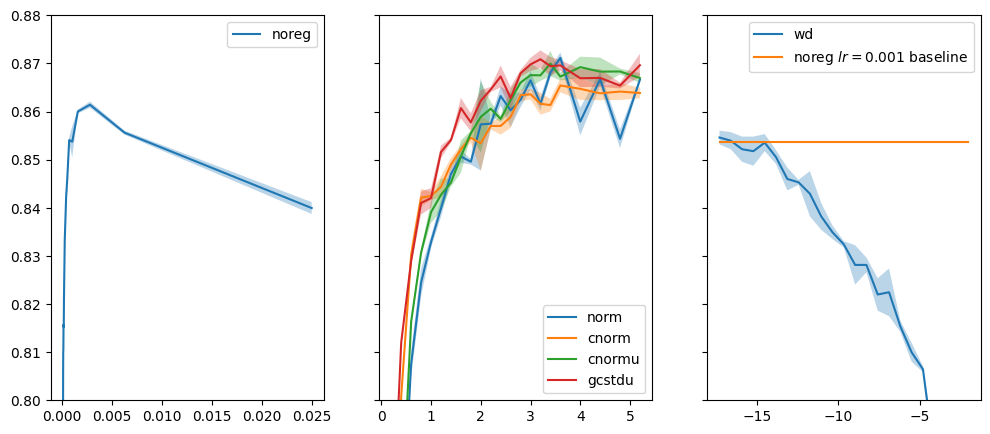

In [4]:
fig,axs = plt.subplots(ncols=3,nrows=1,sharey="row")

x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/noreg"),
                          lambda js : js["optimizer"]["lr"], 
                          acc_fn,
                          axs[0], 
                          norm=False,
                          label="noreg")
print("Max test accuracy of Standard is {0}% with lr {1} | p {2}".format(round(100*y.max(),2),round(x[y.argmax()]**2,6),x[y.argmax()]))


#secx = axs[0].secondary_xaxis('top', functions=(lambda x: 0.001/(x**2+1e-7), lambda x: 0.001/(x**2+1e-7)))
#secx.set_ticks([0.4,0.6,1.0,2.0,3.0])

for exp in ["norm","cnorm","cnormu","gcstdu"]:
    x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}"),
                              lambda js: js["norm"]["norm_multiply"],
                              acc_fn, 
                              axs[1], 
                              norm=False, 
                              label=exp)
    print("Max test accuracy of {0} is {1}% with p {2}".format(exp,round(100*y.max(),2),x[y.argmax()]))

x,y,_ = plot_hyperparam_y(get_subexpspaths(f"{data_path}/wd"),
                          lambda js : np.log(js["optimizer"]["lambda_wd"]),
                          acc_fn,
                          axs[2], 
                          norm=False,
                          label="wd")
print("Max test accuracy of wd is {0}% with lambda {1}".format(round(100*y.max(),2),np.exp(x[y.argmax()])))

noreg_001_stats = get_stats(f"{data_path}/noreg/0.001","test_stats")
noreg_001_stats_y = np.mean(np.max(list(noreg_001_stats["acc"].values()),axis=0))
axs[2].plot([np.min(x),np.max(x)],[noreg_001_stats_y,noreg_001_stats_y],label=r"noreg $lr=0.001$ baseline")

axs[0].set_ylim(0.8,0.88)
fig.set_size_inches(12,5)
axs[0].legend()
axs[1].legend()
axs[2].legend()


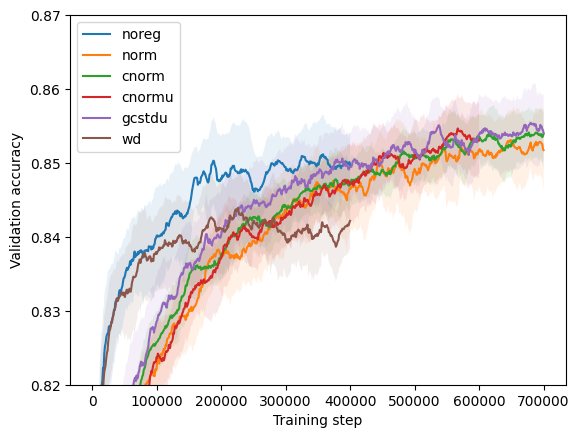

In [7]:
SMOOTHING = 10
SHOW_STD = True
ALPHA = 0.1
stats = get_stats(f"{data_path}/noreg/0.00278","test_stats")
plot_step_stat(stats["acc"],plt,label="noreg",smoothing=SMOOTHING,show_std=SHOW_STD,alpha=ALPHA)

stats = get_stats(f"{data_path}/norm/3.6_1","test_stats")
plot_step_stat(stats["acc"],plt,label="norm",smoothing=SMOOTHING,show_std=SHOW_STD,alpha=ALPHA)

stats = get_stats(f"{data_path}/cnorm/4.0_1","test_stats")
plot_step_stat(stats["acc"],plt,label="cnorm",smoothing=SMOOTHING,show_std=SHOW_STD,alpha=ALPHA)

stats = get_stats(f"{data_path}/cnormu/4.0_1","test_stats")
plot_step_stat(stats["acc"],plt,label="cnormu",smoothing=SMOOTHING,show_std=SHOW_STD,alpha=ALPHA)

stats = get_stats(f"{data_path}/gcstdu/3.2_1","test_stats")
plot_step_stat(stats["acc"],plt,label="gcstdu",smoothing=SMOOTHING,show_std=SHOW_STD,alpha=ALPHA)

stats = get_stats(f"{data_path}/wd/3e-08","test_stats")
plot_step_stat(stats["acc"],plt,label="wd",smoothing=SMOOTHING,show_std=SHOW_STD,alpha=ALPHA)

plt.legend() 
ax = plt.gca()
ax.set_ylim(0.82,0.87) 
ax.set_xlabel("Training step")
ax.set_ylabel("Validation accuracy")
plt.savefig("./images/noreg_norm_gcstdu_wd_best_hyperparameter_accuracy.png", bbox_inches='tight')

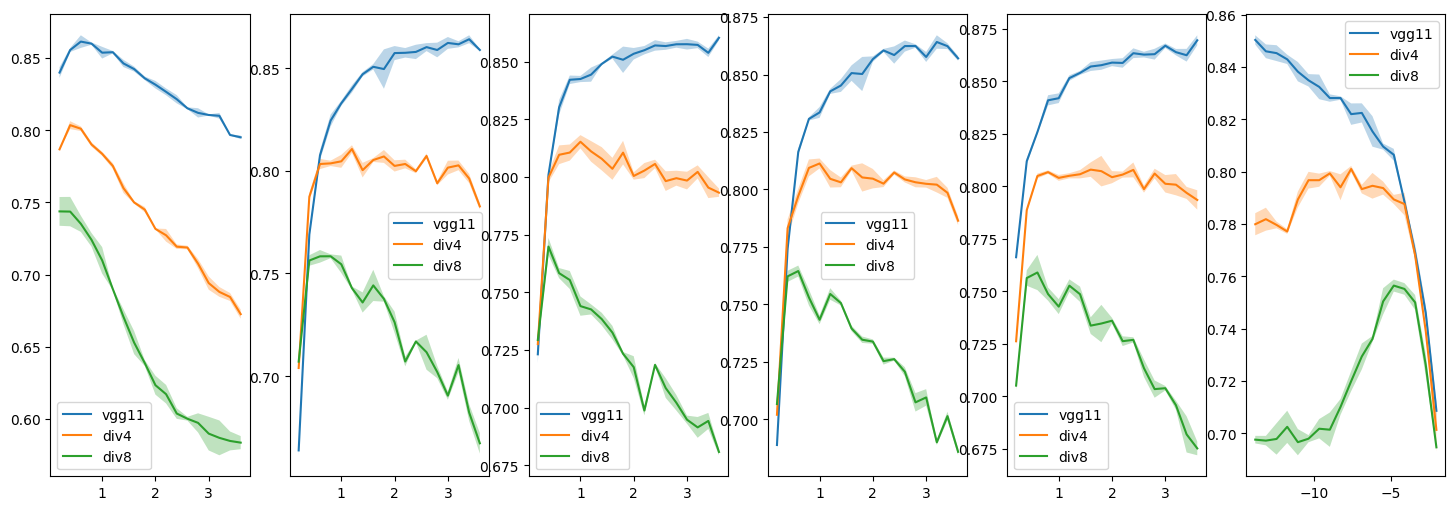

In [17]:
fig,axs = plt.subplots(ncols=6,nrows=1,sharey="col")
fig.set_size_inches(18,6)
for ax,exp,x_fn in zip(axs,["noreg","norm","cnorm","cnormu","gcstdu","wd"],[lr_to_p_fn,p_to_p_fn,p_to_p_fn,p_to_p_fn,p_to_p_fn,wd_to_log_fn]):
    
    x,y,y_normed = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}"),x_fn,acc_fn, ax, "vgg11",norm=False)
    x_div4,y_div4,y_normed_div4 = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}_div4"),x_fn,acc_fn, ax, "div4",norm=False)
    x_div8,y_div8,y_normed_div8 = plot_hyperparam_y(get_subexpspaths(f"{data_path}/{exp}_div8"),x_fn,acc_fn, ax, "div8",norm=False)
    ax.legend()